In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
file = {}
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        file[filename.replace('.csv','')] = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Visualização dos dados

In [2]:
df_train = pd.read_csv(file['train'])
df_train

id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1.411685   Sometimes   
3                                yes  yes  3.000000  3.000000   Sometimes   
4                                yes  yes  2.679664  1.971472   Sometimes   
...                              ...  ...       ...       ...         ...   
20753                            yes  yes  2.919584  3.000000   Sometimes   
20754                             no  yes  3.000000  4.000000  Frequently   
20755                            yes  yes  2.407817  3.000000   Sometimes   
20756                            yes  yes  2.671238  1.971472   Sometimes   
20757                            yes  yes  3.000000  3.000000   Sometimes   

      SMOKE      CH2O SCC       FAF       TUE       CALC  \
0        no  2.763573  no  0.000000  0.976473  Sometimes   
1        no  2.000000  no  1.000000  1.000000         no   
2        no  1.910378  no  0.866045  1.673584         no   
3        no  1.674061  no  1.467863  0.780199  Sometimes   
4        no  1.979848  no  1.967973  0.931721  Sometimes   
...     ...       ...  ..       ...       ...        ...   
20753    no  2.151809  no  1.330519  0.196680  Sometimes   
20754    no  1.000000  no  2.000000  1.000000  Sometimes   
20755    no  2.000000  no  1.158040  1.198439         no   
20756    no  2.144838  no  0.000000  0.973834         no   
20757    no  2.003563  no  0.684487  0.713823  Sometimes   

                      MTRANS           NObeyesdad  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 18 columns]

# Análise exploratória

In [3]:
# Colunas presentes
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Fazemos o codigo a cima para entender quais as colunas do dataframe e atravez dos nomes tenta inferir a que informação essa coluna traz

In [4]:
print('Qtd de linhas antes do drop: ',df_train.index.__len__())
print('Qtd de linhas depois do drop:',df_train.dropna().index.__len__())
print('Qtd de dados nulos:',df_train.index.__len__() - df_train.dropna().index.__len__())

Qtd de linhas antes do drop:  20758

Qtd de linhas depois do drop: 20758

Qtd de dados nulos: 0


não existem valores vazios

In [5]:
for a in df_train:
    print(df_train[a].value_counts())

id

0        1

13826    1

13844    1

13843    1

13842    1

        ..

6917     1

6916     1

6915     1

6914     1

20757    1

Name: count, Length: 20758, dtype: int64

Gender

Female    10422

Male      10336

Name: count, dtype: int64

Age

18.000000    1916

26.000000    1806

21.000000    1643

23.000000    1202

19.000000     886

             ... 

23.462915       1

18.065817       1

21.945380       1

16.120699       1

33.852953       1

Name: count, Length: 1703, dtype: int64

Height

1.700000    1334

1.650000     782

1.600000     672

1.750000     659

1.800000     517

            ... 

1.631456       1

1.753471       1

1.782521       1

1.930416       1

1.536819       1

Name: count, Length: 1833, dtype: int64

Weight

80.000000     866

75.000000     630

50.000000     618

60.000000     506

70.000000     486

             ... 

118.447942      1

77.916920       1

105.107610      1

131.572387      1

80.615325       1

Name: count, Length: 1979, dtype: 

In [6]:
df_test = pd.read_csv(file['test'])
for a in df_test:
    print(df_test[a].value_counts())

id

20758    1

29989    1

29978    1

29979    1

29980    1

        ..

25374    1

25375    1

25376    1

25377    1

34597    1

Name: count, Length: 13840, dtype: int64

Gender

Female    6965

Male      6875

Name: count, dtype: int64

Age

18.000000    1320

26.000000    1257

21.000000    1073

23.000000     816

19.000000     579

             ... 

18.625537       1

26.022494       1

37.604416       1

22.777890       1

24.451091       1

Name: count, Length: 1539, dtype: int64

Height

1.700000    847

1.650000    539

1.750000    445

1.600000    404

1.800000    309

           ... 

1.536919      1

1.792715      1

1.805445      1

1.761408      1

1.658393      1

Name: count, Length: 1739, dtype: int64

Weight

80.000000     631

75.000000     426

50.000000     407

60.000000     324

70.000000     282

             ... 

68.722222       1

76.052200       1

105.524857      1

104.921225      1

85.720788       1

Name: count, Length: 1798, dtype: int64

family

O código acima foi feito para entender todos os possíveis valores presentes em cada coluna da tabela.

Podendo perceber que para o atributo: CALC, existe um valor nos dados de teste que nao aparecem nos dados de treino, valor 'Always'. Portanto, como não temos dados para treinar a partir dele, esse valor será adicionado com valor 'Frequently'.

Através da análise dos dados também percebe-se que existem apenas 2 valores para *Gender*, e que os valores de idade não são discretos, uma vez que existem valores como '33.852953' ou '16.120699', dessa forma, não podemos tratar essa coluna como um dado discreto como seria usado normalmente.

| Atributo | Tipo do atributo |
| --- | --- |
| CALC | Ordinal categórico |
| CAEC | Ordinal categórico |
| NObeyesdad | Ordinal categórico |
| Gender | Dado binário |
| family_history_with_overweight | Dado binário |
| FAVC | Dado binário |
| SMOKE | Dado binário |
| SCC | Dado binário |
| Age | Numérico contínuo |
| Height | Numérico contínuo |
| Weight | Numérico contínuo |
| FCVC | Numérico contínuo |
| NCP | Numérico contínuo |
| CH2O | Numérico contínuo |
| FAF | Numérico contínuo |
| TUE | Numérico contínuo |

<Axes: >

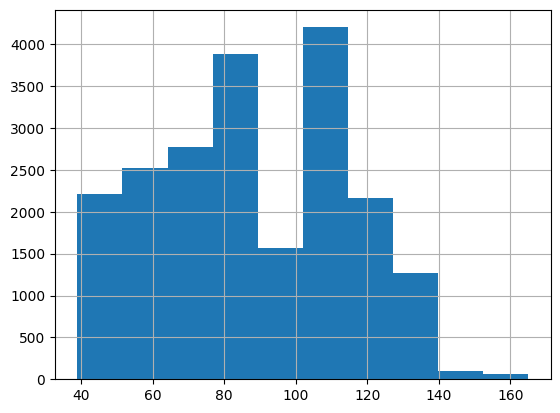

In [7]:
df_train['Weight'].hist()

Entende-se que peso está seguindo a norma do SI e esta em Kg.

<Axes: >

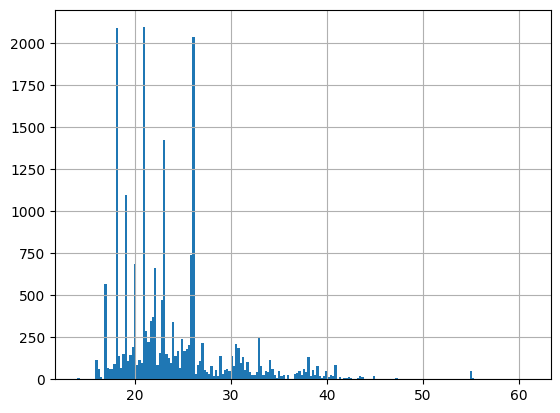

In [8]:
df_train['Age'].hist(bins=200)

Através da análise percebe-se que a idade possui muitas linhas com valores inteiros, porém existem linhas com idade em valores contínuos. Assim, acredita-se que essa é uma forma de separar dados reais da pesquisa('valores inteiros') que esse problema se baseia e os dados criados('valores contínuos').

count    20758.000000
mean         1.700245
std          0.087312
min          1.450000
25%          1.631856
50%          1.700000
75%          1.762887
max          1.975663
Name: Height, dtype: float64

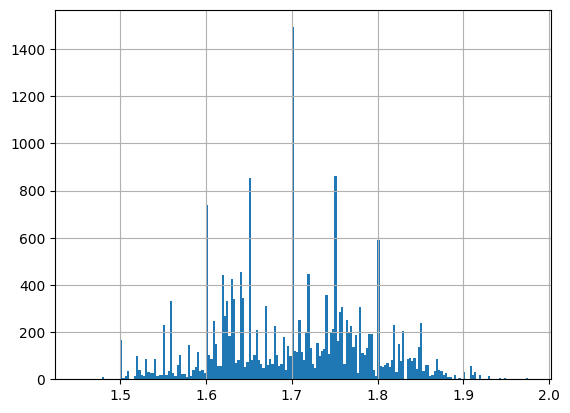

In [9]:
df_train['Height'].hist(bins=200)
df_train['Height'].describe()

Neste pode-se ver o mesmo comportamento, que supõe-se que os valores interios sejam os dados reias das pesquisa e que estes valores estao dispostos entre 1,4 e 2,0.

Se baseando na análise feita por [KHEMKARAN SEVTA](https://www.kaggle.com/competitions/playground-series-s4e2/discussion/472605) Entendemos as seguintes colunas desta forma:
 - 'FAVC' : Frequent consumption of high calorie food
 - 'FCVC' : Frequency of consumption of vegetables
 - 'NCP' : Number of main meals
 - 'CAEC' : Consumption of food between meals
 - 'SMOKE' : Smoke?
 - 'CH2O' : Consumption of water daily
 - 'SCC' : Calories consumption monitoring
 - 'FAF' : Physical activity frequency
 - 'TUE' : Time using technology devices
 - 'CALC' : Consumption of alcohol
 - 'MTRANS' : Transportation used

<Axes: ylabel='count'>

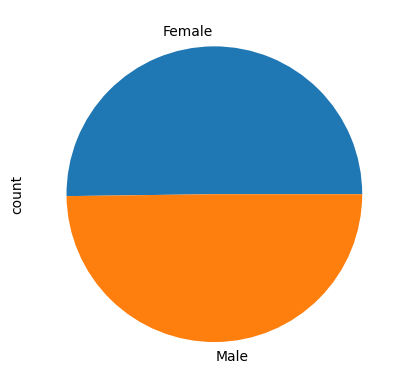

In [10]:
df_train['Gender'].value_counts().plot.pie()

<Axes: ylabel='count'>

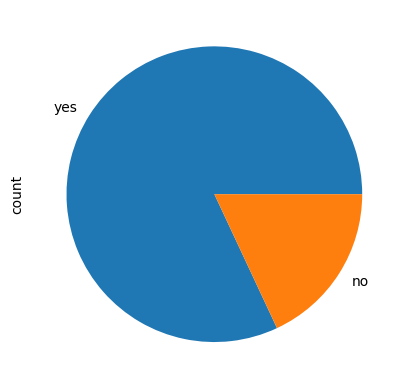

In [11]:
df_train['family_history_with_overweight'].value_counts().plot.pie() 

<Axes: ylabel='count'>

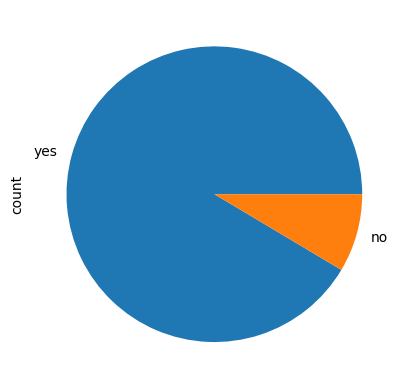

In [12]:
df_train['FAVC'].value_counts().plot.pie()

<Axes: ylabel='count'>

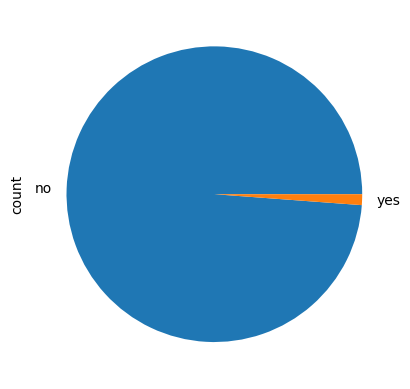

In [13]:
df_train['SMOKE'].value_counts().plot.pie()

Para os dados binários: "Gender", "family_history_with_overweight", 'FAVC', 'SMOKE' e 'SCC' vemos um grande desbalanceamento de dados, exceto para 'gender', o que pode acarretar em problemas no treinamento, devido ao desbalanceamento dos dados.

Partindo da ideia de que parte dos dados foram feitos sinteticamente criados e analisando os dados com o  'value_counts' percebe-se uma grande concentração de dados inteiros.

# Multi-Class Prediction of Obesity Risk

Tornaremos dados categoricos em numeros, no caso de CALC por haver tao poucos 'Always' este foi colocado junto com 'Frequently'.

Mtrans foi transformado em numeros, mas entendemos que não é ordinal, mais a frente tera o onehotencode.

In [14]:
encode_values = {
    "CAEC":{
        "Always":3,
        "Frequently":2,
        "Sometimes":1,
        "no":0
    },
    "CALC":{
        "Always":2,
        "Frequently":2,
        "Sometimes":1,
        "no":0,
    },
    'MTRANS':{
        "Bike":4,
        "Public_Transportation":3,
        "AutomobileAlways":2,
        "Walking":1,
        "Motorbike":0
    },
    'NObeyesdad':{
        "Obesity_Type_III":6,
        "Obesity_Type_II":5,
        "Obesity_Type_I":4,
        'Overweight_Level_II':3,
        "Overweight_Level_I":2,
        "Normal_Weight":1,
        'Insufficient_Weight':0
    }
}
for column in encode_values:
    df_train[column] = df_train[column].map(encode_values[column])

Aqui tornamos as colunas binarias em valores 0 ou 1

In [15]:
encode_values_bool = {
    "Gender":'Male',
    "family_history_with_overweight":'yes',
    'FAVC':'yes',
    'SMOKE':'yes',
    'SCC':'yes'
}
for column in encode_values_bool:
    df_train[column] = (df_train[column]== encode_values_bool[column]) * 1


O mesmo para o conjunto de teste

In [16]:
for column in encode_values_bool:
    df_test[column] = (df_test[column] == encode_values_bool[column]) * 1
    
encode_values_without_NObeyesdad = encode_values.copy()
encode_values_without_NObeyesdad.pop("NObeyesdad")

for column in encode_values_without_NObeyesdad:
    df_test[column] = df_test[column].map(encode_values_without_NObeyesdad[column])
 


In [17]:
df_train

id  Gender        Age    Height      Weight  \
0          0       1  24.443011  1.699998   81.669950   
1          1       0  18.000000  1.560000   57.000000   
2          2       0  18.000000  1.711460   50.165754   
3          3       0  20.952737  1.710730  131.274851   
4          4       1  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753       1  25.137087  1.766626  114.187096   
20754  20754       1  18.000000  1.710000   50.000000   
20755  20755       1  20.101026  1.819557  105.580491   
20756  20756       1  33.852953  1.700000   83.520113   
20757  20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     1      0   
1                                   1     1  2.000000  3.000000     2      0   
2                                   1     1  1.880534  1.411685     1      0   
3                                   1     1  3.000000  3.000000     1      0   
4                                   1     1  2.679664  1.971472     1      0   
...                               ...   ...       ...       ...   ...    ...   
20753                               1     1  2.919584  3.000000     1      0   
20754                               0     1  3.000000  4.000000     2      0   
20755                               1     1  2.407817  3.000000     1      0   
20756                               1     1  2.671238  1.971472     1      0   
20757                               1     1  3.000000  3.000000     1      0   

           CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0      2.763573    0  0.000000  0.976473     1     3.0           3  
1      2.000000    0  1.000000  1.000000     0     NaN           1  
2      1.910378    0  0.866045  1.673584     0     3.0           0  
3      1.674061    0  1.467863  0.780199     1     3.0           6  
4      1.979848    0  1.967973  0.931721     1     3.0           3  
...         ...  ...       ...       ...   ...     ...         ...  
20753  2.151809    0  1.330519  0.196680     1     3.0           5  
20754  1.000000    0  2.000000  1.000000     1     3.0           0  
20755  2.000000    0  1.158040  1.198439     0     3.0           5  
20756  2.144838    0  0.000000  0.973834     0     NaN           3  
20757  2.003563    0  0.684487  0.713823     1     3.0           5  

[20758 rows x 18 columns]

##  REDE NEURAL

Para o primeiro treinamento em busca da melhor predição de risco de obesidade foi utilizada um rede neural simples, na qual servirão de entradas todas as colunas do cojunto de treinamento, já convertidas anteriormente para tipos numéricos(int e real), conforme necessidade da rede, exceto a coluna de id e de NObeyesdad. O processo consiste na passagem por camadas escondidas para encontrar padrões existentes. A quantidade de camadas e neurônios são variadas para obter a melhor combinação para o treinamento, ajustando os meta parâmetros. Também foi realizado um holdout simples para validar o treinamento. 

Parâmetros como, função de ativação de neurônio(activation), otimizador(optimizer) e função loss utilizou-se valores padrões comumente utilizados.

In [42]:
import tensorflow as tf

x_treino = df_train.get(df_train.columns[1:-1])
y_treino = df_train.get(df_train.columns[-1])
y_treino = tf.keras.utils.to_categorical(y_treino, num_classes=7)
x_valid = df_test.get(df_test.columns[1:])
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
for qtd_layers in [5, 10, 15, 20]:
    for qtd_neuronio_per_layer in [5, 10, 15, 20]:
        print(qtd_layers, qtd_neuronio_per_layer)
        # Definir a arquitetura da rede
        layers =  [
          tf.keras.layers.Dense(16, activation='relu'),
        ]
        for a in range(qtd_layers):
            layers.append(tf.keras.layers.Dense(qtd_neuronio_per_layer, activation='relu'))
        layers.append(
          tf.keras.layers.Dense(7, activation='softmax')
        )
        modelo = tf.keras.Sequential(layers)

        # Compilar o modelo
        modelo.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Treinar o modelo
        modelo.fit(x_treino, y_treino, epochs=2000, batch_size=200) # 200 batch size pra treina mais rapido , 20 pra mais lento ? vale a pena?
        final = modelo.predict(x_valid)
        predicted_classes = np.argmax(final, axis=1)
        outputs = [decode[a] for a in predicted_classes]
        pd.DataFrame({"id": df_test['id'],'NObeyesdad': outputs}).to_csv(f'kaggle\output\saida_{qtd_layers}_{qtd_neuronio_per_layer}.csv')

# TO DO: Gráfico de Acurácia por quantidade de neurônios

5 5

Epoch 1/2000

104/104 [==============================] - 1s 1ms/step - loss: 1.9738 - accuracy: 0.2003

Epoch 2/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.9129 - accuracy: 0.2736

Epoch 3/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.8646 - accuracy: 0.2936

Epoch 4/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.7648 - accuracy: 0.2955

Epoch 5/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.6557 - accuracy: 0.3400

Epoch 6/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.5960 - accuracy: 0.3549

Epoch 7/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.5595 - accuracy: 0.3666

Epoch 8/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.5312 - accuracy: 0.3742

Epoch 9/2000

104/104 [==============================] - 0s 1ms/step - loss: 1.5129 - accuracy: 0.3792

Epoch 10/2000

104/104 [==============================] - 0

Após o treinamento, foram selecionados os 5 resultados com melhor acurácia para a submissão na competição do Kaggle, conforme destacado abaixo:

| Quantidade de Camadas | Quantidade de Neurônios | Acurácia | Resultado da Submissão |
| --- | --- |--- | --- |
| 05 | 05 | 0.7994 | |
| 05 | 10 | 0.8727 | |
| 05 | 15 | 0.8834 | |
| 05 | 20 | 0.8861 | 0.87066 |
| 10 | 05 | 0.8491 | |
| 10 | 10 | 0.8746 | |
| 10 | 15 | 0.8855 | 0.87355 |
| 10 | 20 | 0.8867 | 0.85549 |
| 15 | 05 | 0.8362 | |
| 15 | 10 | 0.8721 | |
| 15 | 15 | 0.8782 | |
| 15 | 20 | 0.8875 | 0.86777 |
| 20 | 05 | 0.8358 | |
| 20 | 10 | 0.8705 | |
| 20 | 15 | 0.8821 | |
| 20 | 20 | 0.8904 | 0.85982 |

De maneira geral as redes com 10 camadas apresentaram um melhor resultado, e um possível *overfitting* ocorre a partir da combinação de 10 camadas e 15 neurônios.

#### Como tentiva de alcançar resultados melhores do que os obtidos pela rede neural, testes com validação cruzada serão utilizados, com os classificadores KNN e Árvore de Decisão, descritos abaixo.

## Processamento base para KNN e Árvore de decisão

Para realizar estes treinamentos é necessário a operação de *onehotencode* para 'MTRANS' porque não trata-se de uma numeração ordinal.

In [18]:
df_train_encoded = df_train.copy(deep=True)

df_train_encoded = pd.get_dummies(df_train, columns=['MTRANS'], dtype=int) # one hot encode do pandas

x_treino = df_train_encoded.copy(deep=True)
x_treino.drop(['id', 'NObeyesdad'], axis=1, inplace=True)

y_treino = df_train_encoded.get('NObeyesdad')
y_treino

df_test_encoded = pd.get_dummies(df_test, columns=['MTRANS'], dtype=int) # one hot encode do pandas
x_test = df_test_encoded.copy(deep=True)
x_test.drop(['id'], axis=1, inplace=True)
x_test

Gender        Age    Height      Weight  \
0           1  26.899886  1.848294  120.644178   
1           0  21.000000  1.600000   66.000000   
2           0  26.000000  1.643355  111.600553   
3           1  20.979254  1.553127  103.669116   
4           0  26.000000  1.627396  104.835346   
...       ...        ...       ...         ...   
13835       1  23.327836  1.721384   78.030383   
13836       0  29.000000  1.590000   62.000000   
13837       0  22.935612  1.585547   44.376637   
13838       1  21.000000  1.620000   53.000000   
13839       1  26.490926  1.812259  120.980508   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.938616  3.000000     1      0   
1                                   1     1  2.000000  1.000000     1      0   
2                                   1     1  3.000000  3.000000     1      0   
3                                   1     1  2.000000  2.977909     1      0   
4                                   1     1  3.000000  3.000000     1      0   
...                               ...   ...       ...       ...   ...    ...   
13835                               1     0  2.813234  3.000000     1      0   
13836                               0     1  3.000000  3.000000     1      0   
13837                               0     1  3.000000  2.273740     2      0   
13838                               1     1  2.000000  3.000000     1      0   
13839                               1     1  2.744994  3.000000     1      0   

           CH2O  SCC       FAF       TUE  CALC  MTRANS_0.0  MTRANS_1.0  \
0      2.825629    0  0.855400  0.000000     1           0           0   
1      3.000000    0  1.000000  0.000000     1           0           0   
2      2.621877    0  0.000000  0.250502     1           0           0   
3      2.786417    0  0.094851  0.000000     1           0           0   
4      2.653531    0  0.000000  0.741069     1           0           0   
...         ...  ...       ...       ...   ...         ...         ...   
13835  1.000000    0  0.807076  0.778632     1           0           0   
13836  2.000000    0  0.000000  0.000000     1           0           0   
13837  2.000000    0  1.949840  1.000000     1           0           0   
13838  2.000000    0  3.000000  2.000000     0           0           0   
13839  2.205977    0  1.304291  0.630866     1           0           0   

       MTRANS_3.0  MTRANS_4.0  
0               1           0  
1               1           0  
2               1           0  
3               1           0  
4               1           0  
...           ...         ...  
13835           1           0  
13836           1           0  
13837           1           0  
13838           1           0  
13839           1           0  

[13840 rows x 19 columns]

### Preparação dos conjuntos de treino e teste para a realização dos treinamentos em seguida
Em um deles foi adicionada uma coluna com cálculo de IMC e em outro foram removidas as colunas de *Weight* e *Height*, além da adição do IMC.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

SKF = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
SCORES = ['accuracy', 'precision', 'recall', 'f1']

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

x_test_imc = x_test.copy(deep=True)
x_test_imc['IMC'] = x_test['Weight']/(x_test['Height']**2)
x_treino_imc = x_treino.copy(deep=True)
x_treino_imc['IMC'] = x_treino['Weight']/(x_treino['Height']**2)
x_test_imc_no = x_test_imc.copy(deep=True)
x_test_imc_no.drop(['Weight','Height'],axis=1,inplace=True)
x_treino_imc_np_Weight_no_Height = x_treino_imc.copy(deep=True)
x_treino_imc_np_Weight_no_Height.drop(['Weight','Height'],axis=1,inplace=True)

# Árvore de decisão
Teste de parâmetros para obter melhor valor de *max_depth*.

In [12]:
avg = {}
for max_depth in range(2, 20):
  avg[max_depth] = []
  clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
  print(f'Max depth: {max_depth}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[max_depth].append(scores['accuracy'])

Max depth: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.41      0.98      0.57       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.42      0.90      0.58       505

 Overweight_Level_I       0.00      0.00      0.00       582

      Normal_Weight       0.80      0.97      0.88       650

Insufficient_Weight       1.00      1.00      1.00       809



           accuracy                           0.60      4152

          macro avg       0.38      0.55      0.43      4152

       weighted avg       0.43      0.60      0.49      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.40      0.97      0.56       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.40      0.97      0.57       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.43      0.89      0.58       504

 Overweight_Level_I       0.00      0.00      0.00       582

      Normal_Weight       0.79      0.98      0.87       650

Insufficient_Weight       0.99      1.00      0.99       809



           accuracy                           0.60      4151

          macro avg       0.37      0.55      0.43      4151

       weighted avg       0.43      0.60      0.49      4151



Max depth: 3

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.74      0.81      0.77       505

    Obesity_Type_II       0.50      0.75      0.60       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.50      0

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.76      0.82      0.79       505

    Obesity_Type_II       0.50      0.78      0.61       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.54      0.86      0.66       504

 Overweight_Level_I       0.86      0.50      0.63       582

      Normal_Weight       0.89      0.95      0.92       650

Insufficient_Weight       1.00      1.00      1.00       809



           accuracy                           0.73      4151

          macro avg       0.65      0.70      0.66      4151

       weighted avg       0.69      0.73      0.69      4151



Max depth: 4

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.74      0.81      0.77       505

    Obesity_Type_II       0.68      0.36      0.47       616

     Obesity_Type_I       0.50      0.62      0.55       485

Overweight_Level_II       0.60      0

Realiza os cálculos de média e desvio padrão a partir da acurácia obtida no treinamento anterior.

In [13]:
for max_depth in range(2, 20):
    print('acuracy para',max_depth,'-> media:',np.mean(avg[max_depth]),'std:',np.std(avg[max_depth]))

acuracy para 2 -> media: 0.5998651229199827 std: 0.0008472379883505382

acuracy para 3 -> media: 0.7249738438494056 std: 0.004674186133561093

acuracy para 4 -> media: 0.7609111182903208 std: 0.004944488993186861

acuracy para 5 -> media: 0.8363044469169394 std: 0.005533158707381897

acuracy para 6 -> media: 0.8397726898224027 std: 0.00252789977984527

acuracy para 7 -> media: 0.8662203758966083 std: 0.00508255895386842

acuracy para 8 -> media: 0.8723385942705265 std: 0.0030106611646514426

acuracy para 9 -> media: 0.8736394043917267 std: 0.004407775563368327

acuracy para 10 -> media: 0.8743621798308462 std: 0.0047552073810895245

acuracy para 11 -> media: 0.8737839246665728 std: 0.0037142739237944803

acuracy para 12 -> media: 0.8695445394916099 std: 0.004261592871241676

acuracy para 13 -> media: 0.8668949237572579 std: 0.003091813422346511

acuracy para 14 -> media: 0.86222202417506 std: 0.004506988587701555

acuracy para 15 -> media: 0.8592350938952427 std: 0.004288187735226573



Para a escolha do melhor parâmetro para realizar a submissão foi feito o seguinte processo:
1. Seleciona a melhor média de acurácia;
2. Adiciona a lista de seleção as médias com até 0,01 de variação de acurácia em relação à melhor;
3. O valor de parâmetro com o menor desvio padrão da lista é selecionado.

A partir da análise dos dados foi escolhido max_depth = 11 como o melhor resultado, abaixo é realizado o treinamento pela árvore de decisão com os dados de treino originais.

O mesmo procedimento é realizado para os casos seguintes de KNN e Árvore de Decisão.

In [14]:
max_depth = 11
clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_test)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\arvore_{max_depth}.csv')

O resultado do treinamento foi submetido e obteve 0,87716 de acurácia. O valor se manteve próximo ao que foi por meio da rede neural.

Agora é repetido o processo utilizando o conjunto de treinamento montado anteriormente, com adição de IMC.

In [15]:
avg = {}
for max_depth in range(2, 20):
  avg[max_depth] = []
  clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
  print(f'Max depth: {max_depth}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_imc,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino_imc.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino_imc.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[max_depth].append(scores['accuracy'])

Max depth: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.49      0.95      0.65       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.00      0.00      0.00       505

 Overweight_Level_I       0.00      0.00      0.00       582

      Normal_Weight       0.29      1.00      0.45       650

Insufficient_Weight       1.00      0.91      0.95       809



           accuracy                           0.47      4152

          macro avg       0.25      0.41      0.29      4152

       weighted avg       0.31      0.47      0.35      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.48      0.94      0.64       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.87      0.90      0.88       505

    Obesity_Type_II       0.79      0.84      0.82       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.00      0.00      0.00       505

 Overweight_Level_I       0.34      0.97      0.50       582

      Normal_Weight       0.94      0.84      0.89       650

Insufficient_Weight       1.00      0.91      0.95       809



           accuracy                           0.68      4152

          macro avg       0.56      0.64      0.58      4152

       weighted avg       0.61      0.68      0.62      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.89      0.91      0.90       505

    Obesity_Type_II       0.77      0.86      0.81       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       0.00      0.00      0.00 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.87      0.90      0.88       505

    Obesity_Type_II       0.79      0.84      0.82       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.47      0.89      0.61       505

 Overweight_Level_I       0.70      0.84      0.76       582

      Normal_Weight       0.96      0.84      0.90       650

Insufficient_Weight       1.00      0.93      0.96       809



           accuracy                           0.77      4152

          macro avg       0.68      0.75      0.70      4152

       weighted avg       0.72      0.77      0.74      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.89      0.91      0.90       505

    Obesity_Type_II       0.77      0.86      0.81       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       0.46      0.86      0.60 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.95      0.86      0.90       505

    Obesity_Type_II       0.78      0.92      0.85       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.47      0.87      0.61       504

 Overweight_Level_I       0.69      0.83      0.76       582

      Normal_Weight       0.96      0.85      0.90       650

Insufficient_Weight       1.00      0.92      0.96       809



           accuracy                           0.78      4151

          macro avg       0.69      0.75      0.71      4151

       weighted avg       0.73      0.78      0.74      4151



Max depth: 5

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.87      0.90      0.89       505

    Obesity_Type_II       0.80      0.84      0.82       616

     Obesity_Type_I       0.72      0.66      0.69       485

Overweight_Level_II       0.69      0

In [16]:
for max_depth in range(2, 20):
    print('acuracy para',max_depth,'-> media:',np.mean(avg[max_depth]),'std:',np.std(avg[max_depth]))

acuracy para 2 -> media: 0.4676269246354733 std: 0.006024851752897695

acuracy para 3 -> media: 0.6744390120726765 std: 0.006845349400637334

acuracy para 4 -> media: 0.7650548141938545 std: 0.008318997276882942

acuracy para 5 -> media: 0.8320171358759805 std: 0.0061266955472336565

acuracy para 6 -> media: 0.8535507728713141 std: 0.0039040913822950313

acuracy para 7 -> media: 0.8627038357867199 std: 0.0036034899067489048

acuracy para 8 -> media: 0.871085860871559 std: 0.0015775072968599113

acuracy para 9 -> media: 0.8748918476825466 std: 0.0035694805529224607

acuracy para 10 -> media: 0.8744583100666599 std: 0.004706270972744645

acuracy para 11 -> media: 0.8747474550552854 std: 0.004391429750564679

acuracy para 12 -> media: 0.8713271960374478 std: 0.005499121506261541

acuracy para 13 -> media: 0.8673286702510108 std: 0.004151654406693471

acuracy para 14 -> media: 0.8649196237970376 std: 0.0038764141647741252

acuracy para 15 -> media: 0.8630409182456672 std: 0.003079920004310

O teste de parâmetros evidenciou o max_depth = 8 como o melhor resultado, a partir da análise de média e desvio padrão.

In [17]:
max_depth = 8
clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
clf.fit(x_treino_imc, y_treino)
y_pred = clf.predict(x_test_imc)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\arvore_imc_8.csv')

Como resultado da submissão foi obtido 0.86958 de acurácia.

Devido à queda no resultado, o treinamento abaixo ocorre com um dos conjuntos montado anteriormente, adicionando IMC e removendo peso e altura.

In [18]:
avg = {}
for max_depth in range(2, 20):
  avg[max_depth] = []
  clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
  print(f'Max depth: {max_depth}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_imc_np_Weight_no_Height,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino_imc_np_Weight_no_Height.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino_imc_np_Weight_no_Height.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[max_depth].append(scores['accuracy'])

Max depth: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.49      0.95      0.65       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.00      0.00      0.00       505

 Overweight_Level_I       0.00      0.00      0.00       582

      Normal_Weight       0.29      1.00      0.45       650

Insufficient_Weight       1.00      0.91      0.95       809



           accuracy                           0.47      4152

          macro avg       0.25      0.41      0.29      4152

       weighted avg       0.31      0.47      0.35      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       505

    Obesity_Type_II       0.48      0.94      0.64       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.87      0.90      0.88       505

    Obesity_Type_II       0.79      0.84      0.82       616

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.00      0.00      0.00       505

 Overweight_Level_I       0.34      0.88      0.49       582

      Normal_Weight       0.80      0.91      0.85       650

Insufficient_Weight       1.00      0.91      0.95       809



           accuracy                           0.68      4152

          macro avg       0.54      0.63      0.57      4152

       weighted avg       0.59      0.68      0.62      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.89      0.91      0.90       505

    Obesity_Type_II       0.77      0.86      0.81       616

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       0.00      0.00      0.00 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.92      0.87      0.90       504

    Obesity_Type_II       0.77      0.89      0.83       617

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       0.00      0.00      0.00       504

 Overweight_Level_I       0.34      0.86      0.49       582

      Normal_Weight       0.76      0.92      0.83       649

Insufficient_Weight       1.00      0.86      0.92       810



           accuracy                           0.67      4152

          macro avg       0.54      0.63      0.57      4152

       weighted avg       0.59      0.67      0.61      4152



	Fold 3: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.90      0.91      0.91       504

    Obesity_Type_II       0.81      0.84      0.83       617

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.00      0.00      0.00 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.92      0.87      0.90       504

    Obesity_Type_II       0.77      0.89      0.83       617

     Obesity_Type_I       0.00      0.00      0.00       486

Overweight_Level_II       0.46      0.86      0.60       504

 Overweight_Level_I       0.79      0.74      0.76       582

      Normal_Weight       0.90      0.92      0.91       649

Insufficient_Weight       0.97      0.99      0.98       810



           accuracy                           0.78      4152

          macro avg       0.69      0.75      0.71      4152

       weighted avg       0.72      0.78      0.74      4152



	Fold 3: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.90      0.91      0.91       504

    Obesity_Type_II       0.81      0.84      0.83       617

     Obesity_Type_I       0.00      0.00      0.00       485

Overweight_Level_II       0.45      0.88      0.60 

In [19]:
for max_depth in range(2, 20):
    print('acuracy para',max_depth,'-> media:',np.mean(avg[max_depth]),'std:',np.std(avg[max_depth]))

acuracy para 2 -> media: 0.4676269246354733 std: 0.006024851752897695

acuracy para 3 -> media: 0.6732345758781342 std: 0.005543615602309846

acuracy para 4 -> media: 0.7827346661597897 std: 0.003577124837501264

acuracy para 5 -> media: 0.8474327285622844 std: 0.0037290541350591603

acuracy para 6 -> media: 0.8495522586892031 std: 0.0028417724725063546

acuracy para 7 -> media: 0.8557666769248907 std: 0.0022471647833875175

acuracy para 8 -> media: 0.8611139851158274 std: 0.0028426494266812004

acuracy para 9 -> media: 0.8626073226081512 std: 0.0027295937721732153

acuracy para 10 -> media: 0.8610655950767953 std: 0.002765593307278783

acuracy para 11 -> media: 0.8598613097384895 std: 0.0030991887913296426

acuracy para 12 -> media: 0.8544656463214982 std: 0.0016169719926509044

acuracy para 13 -> media: 0.8505151624443167 std: 0.004421626596578072

acuracy para 14 -> media: 0.8473838859545417 std: 0.003585598398117444

acuracy para 15 -> media: 0.8419886054803053 std: 0.0029981046665

As melhores medidas de média e desvio padrão na seleção foram com max_depth = 10.

In [20]:
max_depth = 10
clf = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
clf.fit(x_treino_imc_np_Weight_no_Height, y_treino)
y_pred = clf.predict(x_test_imc_no)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\arvore_imc_no_Wheight_no_height_10.csv')

Como resultado a acurácia de 0.86306 foi obtida.

Analisando os resultados obtidos das pelos três treinamentos, utilizando a árvore de decisão, realizados percebeu-se que não houve melhoras ao modificar o conjunto de dados original. 

# KNN
O mesmo processo mostrado acima é repetido, para os mesmo conjunto de dados montados, porém, avaliando agora o parâmetro *n_neighbors*.

In [21]:
x_treino_imc_np_Weight_no_Height = x_treino_imc.copy(deep=True)
x_treino_imc_np_Weight_no_Height.drop(['Weight','Height'],axis=1,inplace=True)
avg = {}
for n_neighbors in range(2, 20):
  avg[n_neighbors] = []
  clf = KNeighborsClassifier(n_neighbors=n_neighbors,random_state=0)
  print(f'qtd_vizinhos: {n_neighbors}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_imc_np_Weight_no_Height,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino_imc_np_Weight_no_Height.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino_imc_np_Weight_no_Height.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[n_neighbors].append(scores['accuracy'])

qtd_vizinhos: 2

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:

found 0 physical cores < 1

Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  warnings.warn(

  File "h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores

    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


                     precision    recall  f1-score   support



   Obesity_Type_III       0.81      0.93      0.87       505

    Obesity_Type_II       0.78      0.77      0.78       616

     Obesity_Type_I       0.63      0.66      0.64       485

Overweight_Level_II       0.64      0.66      0.65       505

 Overweight_Level_I       0.82      0.75      0.78       582

      Normal_Weight       0.96      0.89      0.93       650

Insufficient_Weight       0.99      0.99      0.99       809



           accuracy                           0.82      4152

          macro avg       0.81      0.81      0.80      4152

       weighted avg       0.82      0.82      0.82      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.82      0.96      0.88       505

    Obesity_Type_II       0.79      0.76      0.78       616

     Obesity_Type_I       0.62      0.68      0.65       486

Overweight_Level_II       0.68      0.65      0.66 

In [22]:
for n_neighbors in range(2, 20):
    print('acuracy para',n_neighbors,'-> media:',np.mean(avg[n_neighbors]),'std:',np.std(avg[n_neighbors]))

acuracy para 2 -> media: 0.8289819316003897 std: 0.0043463807962791446

acuracy para 3 -> media: 0.8525872192739496 std: 0.003223088332537578

acuracy para 4 -> media: 0.8569711015151071 std: 0.0031322671585491727

acuracy para 5 -> media: 0.8594763362265239 std: 0.004351525314469825

acuracy para 6 -> media: 0.8591390216810583 std: 0.0035364132512720405

acuracy para 7 -> media: 0.8627520633651896 std: 0.003134091395249867

acuracy para 8 -> media: 0.8623184677276733 std: 0.002869358167866665

acuracy para 9 -> media: 0.8624148532586572 std: 0.0037100518373121426

acuracy para 10 -> media: 0.8627520633651896 std: 0.003390154766706277

acuracy para 11 -> media: 0.8636674125927358 std: 0.0034315991867648814

acuracy para 12 -> media: 0.8625112968112705 std: 0.0040449640821777965

acuracy para 13 -> media: 0.8624629647938677 std: 0.0029043212168016475

acuracy para 14 -> media: 0.8629447299882239 std: 0.0028345135426195087

acuracy para 15 -> media: 0.8631374662372137 std: 0.003096490929

Analisando os resultados n_neighbors = 14 foi selecionado como o melhor.

O processo de seleção foi o mesmo da Árvore de Decisão.

In [23]:
max_depth = 14
clf = KNeighborsClassifier(n_neighbors=max_depth,random_state=0)
clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_test)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\knn_{max_depth}.csv')

O treinamento submetido obteve o resultado de 0.83851 de acurácia utilizando o conjunto original.

In [24]:
avg = {}
for n_neighbors in range(2, 20):
  avg[n_neighbors] = []
  clf = KNeighborsClassifier(n_neighbors=n_neighbors,random_state=0)
  print(f'qtd vizinhos: {n_neighbors}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_imc,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino_imc.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino_imc.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[n_neighbors].append(scores['accuracy'])

qtd vizinhos: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.82      0.95      0.88       505

    Obesity_Type_II       0.82      0.78      0.80       616

     Obesity_Type_I       0.69      0.72      0.71       485

Overweight_Level_II       0.70      0.72      0.71       505

 Overweight_Level_I       0.84      0.77      0.81       582

      Normal_Weight       0.96      0.93      0.94       650

Insufficient_Weight       0.99      0.98      0.99       809



           accuracy                           0.85      4152

          macro avg       0.83      0.84      0.83      4152

       weighted avg       0.85      0.85      0.85      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.83      0.96      0.89       505

    Obesity_Type_II       0.80      0.78      0.79       616

     Obesity_Type_I       0.65      0.73      0.69       486

Overweight_Level_II    

In [25]:
for max_depth in range(2, 20):
    print('acuracy para',max_depth,'-> media:',np.mean(avg[max_depth]),'std:',np.std(avg[max_depth]))

acuracy para 2 -> media: 0.8513830499789034 std: 0.005332659201542183

acuracy para 3 -> media: 0.8730130609008949 std: 0.003983739649843903

acuracy para 4 -> media: 0.8732056462936478 std: 0.00511514152398018

acuracy para 5 -> media: 0.8786493284112424 std: 0.00448104990533667

acuracy para 6 -> media: 0.8776377793219268 std: 0.005108767340001957

acuracy para 7 -> media: 0.8776377329046232 std: 0.004805565463988751

acuracy para 8 -> media: 0.8773003951505057 std: 0.0031066711428358717

acuracy para 9 -> media: 0.8781193820557203 std: 0.0038869703716120606

acuracy para 10 -> media: 0.8769151315303922 std: 0.0038597769504393822

acuracy para 11 -> media: 0.8775412893520098 std: 0.003237528655520762

acuracy para 12 -> media: 0.8750844562839513 std: 0.003213869602857565

acuracy para 13 -> media: 0.8750844562839515 std: 0.004295629573042913

acuracy para 14 -> media: 0.8746026562766176 std: 0.003948175420995403

acuracy para 15 -> media: 0.8744582752536821 std: 0.0035757162880119993

O valor escolhido foi n_neighbors = 12, melhores medidas foram encontradas no conjunto com IMC adicionado, em relação ao conjunto original.

In [26]:
max_depth = 12
clf = KNeighborsClassifier(n_neighbors=max_depth,random_state=0)
clf.fit(x_treino_imc, y_treino)
y_pred = clf.predict(x_test_imc)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\knn_12.csv')

Como resultado foi obtido 0.88583 de acurácia, cerca de 5 pontos percentuais a mais que utilizando o conjunto original.

In [27]:
avg = {}
for n_neighbors in range(2, 20):
  avg[n_neighbors] = []
  clf = KNeighborsClassifier(n_neighbors=n_neighbors,random_state=0)
  print(f'qtd vizinhos: {n_neighbors}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_imc_np_Weight_no_Height,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino_imc_np_Weight_no_Height.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino_imc_np_Weight_no_Height.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[n_neighbors].append(scores['accuracy'])

qtd vizinhos: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.81      0.93      0.87       505

    Obesity_Type_II       0.78      0.77      0.78       616

     Obesity_Type_I       0.63      0.66      0.64       485

Overweight_Level_II       0.64      0.66      0.65       505

 Overweight_Level_I       0.82      0.75      0.78       582

      Normal_Weight       0.96      0.89      0.93       650

Insufficient_Weight       0.99      0.99      0.99       809



           accuracy                           0.82      4152

          macro avg       0.81      0.81      0.80      4152

       weighted avg       0.82      0.82      0.82      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.82      0.96      0.88       505

    Obesity_Type_II       0.79      0.76      0.78       616

     Obesity_Type_I       0.62      0.68      0.65       486

Overweight_Level_II    

In [28]:
for max_depth in range(2, 20):
    print('acuracy para',max_depth,'-> media:',np.mean(avg[max_depth]),'std:',np.std(avg[max_depth]))

acuracy para 2 -> media: 0.8289819316003897 std: 0.0043463807962791446

acuracy para 3 -> media: 0.8525872192739496 std: 0.003223088332537578

acuracy para 4 -> media: 0.8569711015151071 std: 0.0031322671585491727

acuracy para 5 -> media: 0.8594763362265239 std: 0.004351525314469825

acuracy para 6 -> media: 0.8591390216810583 std: 0.0035364132512720405

acuracy para 7 -> media: 0.8627520633651896 std: 0.003134091395249867

acuracy para 8 -> media: 0.8623184677276733 std: 0.002869358167866665

acuracy para 9 -> media: 0.8624148532586572 std: 0.0037100518373121426

acuracy para 10 -> media: 0.8627520633651896 std: 0.003390154766706277

acuracy para 11 -> media: 0.8636674125927358 std: 0.0034315991867648814

acuracy para 12 -> media: 0.8625112968112705 std: 0.0040449640821777965

acuracy para 13 -> media: 0.8624629647938677 std: 0.0029043212168016475

acuracy para 14 -> media: 0.8629447299882239 std: 0.0028345135426195087

acuracy para 15 -> media: 0.8631374662372137 std: 0.003096490929

Para o conjunto com IMC e removido peso e altura, o n_neighbors = 8 foi escolhido como melhor.

In [29]:
max_depth = 8
clf = KNeighborsClassifier(n_neighbors=n_neighbors,random_state=0)
clf.fit(x_treino_imc_np_Weight_no_Height, y_treino)
y_pred = clf.predict(x_test_imc_no)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\knn_8.csv')

No treinamento o resultado de 0.85079 é alcançado, uma queda em relação ao anterior.

## Conclusão da validação cruzada
De maneira geral os seguintes resultados foram obtidos com submissões:
| Classificador | Conjunto de Dados | Acurácia |
| --- | --- | --- |
| Árvore de Decisão | Original | 0.87716 |
| Árvore de Decisão | Adição de IMC | 0.86958 |
| Árvore de Decisão | Adição de IMC e Remoção de *Weight* e *Height* | 0.86306 |
| KNN | Original | 0.83851 |
| KNN | Adição de IMC | 0.88583 |
| KNN | Adição de IMC e Remoção de *Weight* e *Height* | 0.85079 |

Para a Árvore de Decisão não houve muita diferença modificando o conjunto de dados, sendo o melhor resultado obtido com o conjunto original. Já no KNN o treinamento com conjunto original obteve a menor acurácia dentre todas e a adição do IMC ficou com o melhor resultado.

# Ideais extras
Como os resultado obtidos não foram satisfatórios, outros métodos foram utilizados na tentativa de obter melhores acurácias.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Ensembles

Analisando a página do [scikit-lean sobre ensemble](https://scikit-learn.org/stable/modules/ensemble.htm), escolhemos 'GradientBoostingClassifier' por ser recomendado para menores *sample sizes*.

Este modelo constroi um conjunto de arvores de decisão de uma maneira sequencial. Cada árvore é criada para corrigir os erros cometidos pela árvore anterior no conjunto de treinamento. Portanto, cada árvore depende das árvores que foram construídas anteriormente.

Teste para variação de quantidade de estimadores, [Referencia](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)


In [39]:
avg = {}
for estimadores in range(2, 101,4):
  avg[estimadores] = []
  clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
  print(f'qtd estimadores: {estimadores}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[estimadores].append(scores['accuracy'])

qtd estimadores: 2

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.86      0.90      0.88       505

    Obesity_Type_II       0.73      0.85      0.78       616

     Obesity_Type_I       0.86      0.40      0.55       485

Overweight_Level_II       0.51      0.85      0.64       505

 Overweight_Level_I       0.85      0.49      0.62       582

      Normal_Weight       0.97      0.90      0.93       650

Insufficient_Weight       0.90      1.00      0.94       809



           accuracy                           0.79      4152

          macro avg       0.81      0.77      0.76      4152

       weighted avg       0.82      0.79      0.78      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.89      0.92      0.91       505

    Obesity_Type_II       0.72      0.85      0.78       616

     Obesity_Type_I       0.78      0.40      0.53       486

Overweight_Level_II 

In [40]:
for estimadores in range(2, 101,4):
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 2 -> media: 0.7939112914268632 std: 0.004826187861376065

acuracy para 6 -> media: 0.8265730360026533 std: 0.00245048994898167

acuracy para 10 -> media: 0.8399174537880929 std: 0.003976303930065773

acuracy para 14 -> media: 0.8467102548356387 std: 0.004946698660568831

acuracy para 18 -> media: 0.8588500159443437 std: 0.004327671125404523

acuracy para 22 -> media: 0.8654979137742884 std: 0.0033977974710100865

acuracy para 26 -> media: 0.8736393347657714 std: 0.0030840407975261126

acuracy para 30 -> media: 0.8804319385397766 std: 0.0032046656692031198

acuracy para 34 -> media: 0.8840931033634443 std: 0.0031777463298796986

acuracy para 38 -> media: 0.8878988116706099 std: 0.0026338434920424

acuracy para 42 -> media: 0.8901630593459153 std: 0.0027497119235707886

acuracy para 46 -> media: 0.8927643546671902 std: 0.0017978595075795064

acuracy para 50 -> media: 0.8937760197997651 std: 0.001611021856748627

acuracy para 54 -> media: 0.8957030921815159 std: 0.00230494307

Como a acurácia no treinamento está crescente, testes de submissões são feitos para avaliar desempenho e possível overfit. Então, os estimadores escolhidos foram: [42, 58, 70, 98].

In [ ]:
for estimadores in [42,58,70,98]:
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    clf.fit(x_treino, y_treino)
    y_pred = clf.predict(x_test)
    decode = {
        6:"Obesity_Type_III",
        5:"Obesity_Type_II",
        4:"Obesity_Type_I",
        3:'Overweight_Level_II',
        2:"Overweight_Level_I",
        1:"Normal_Weight",
        0:'Insufficient_Weight',
    }
    outputs = [decode[a] for a in y_pred]
    pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\ensemble{estimadores}.csv')

Como resultado foram obtidos:
| Quantidade de estimadores | Acurácia |
| --- | --- |
| 42 | 0.8927 |
| 58 | 0.89812 |
| 70 | 0.89848 |
| 98 | 0.90173 |

À medida que a quantidade de estimadores aumenta, a acurácia também aumenta. Não há sinal de *overfiting*, então continuamos aumentando a quantidade de estimadores,

In [15]:
avg = {}
for estimadores in range(102, 203,4):
  avg[estimadores] = []
  clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
  print(f'qtd estimadores: {estimadores}')
  for i,(train_index,valid_index) in enumerate(SKF.split(x_treino,y_treino)):
    print(f'\tFold {i}: ')
    _x_treino = x_treino.iloc[train_index]
    _y_treino = y_treino.iloc[train_index]
    clf.fit(_x_treino, _y_treino)
    _x_val = x_treino.iloc[valid_index]
    _y_val = y_treino.iloc[valid_index]
    y_pred = clf.predict(_x_val)
    target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
    scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
    print(classification_report(_y_val,y_pred,target_names=target_names))
    avg[estimadores].append(scores['accuracy'])

qtd estimadores: 102

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.91      0.92      0.92       505

    Obesity_Type_II       0.87      0.85      0.86       616

     Obesity_Type_I       0.77      0.74      0.76       485

Overweight_Level_II       0.78      0.82      0.80       505

 Overweight_Level_I       0.89      0.90      0.90       582

      Normal_Weight       0.97      0.97      0.97       650

Insufficient_Weight       1.00      1.00      1.00       809



           accuracy                           0.90      4152

          macro avg       0.89      0.89      0.89      4152

       weighted avg       0.90      0.90      0.90      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.91      0.94      0.92       505

    Obesity_Type_II       0.85      0.86      0.86       616

     Obesity_Type_I       0.81      0.78      0.79       486

Overweight_Level_I

In [17]:
for estimadores in range(102, 203,4):
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 102 -> media: 0.9027365437397215 std: 0.0032146736966838473

acuracy para 106 -> media: 0.9031219698203975 std: 0.003643553928555443

acuracy para 110 -> media: 0.9037000509197821 std: 0.0035306620787700763

acuracy para 114 -> media: 0.9033628292089239 std: 0.0038543554134877673

acuracy para 118 -> media: 0.9032664900952436 std: 0.0036916918132228207

acuracy para 122 -> media: 0.9035073030664662 std: 0.0031580293824913772

acuracy para 126 -> media: 0.9031701277729116 std: 0.003381751377993731

acuracy para 130 -> media: 0.9035073030664662 std: 0.003172746383839738

acuracy para 134 -> media: 0.9036036305758206 std: 0.0031469779729461885

acuracy para 138 -> media: 0.9038927175428164 std: 0.0035953826852524406

acuracy para 142 -> media: 0.9039890566564968 std: 0.0032874740661451517

acuracy para 146 -> media: 0.904326266763029 std: 0.003045130299443444

acuracy para 150 -> media: 0.9042780856018631 std: 0.0029728344955603525

acuracy para 154 -> media: 0.90418181611413

Teste de overfit: 202

In [18]:
for estimadores in [202,186,150]:
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    clf.fit(x_treino, y_treino)
    y_pred = clf.predict(x_test)
    decode = {
        6:"Obesity_Type_III",
        5:"Obesity_Type_II",
        4:"Obesity_Type_I",
        3:'Overweight_Level_II',
        2:"Overweight_Level_I",
        1:"Normal_Weight",
        0:'Insufficient_Weight',
    }
    outputs = [decode[a] for a in y_pred]
    pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\ensemble{estimadores}.csv')

O resultado com maior número de estimadores foi submetido(202) e obteve 0.90715 de acurácia, logo, então supomos que ainda não temos chegado no melhor resultado. O processo é continuado, aumentando a quantidade de estimadores.

In [21]:
avg = {}
for estimadores in range(1000, 299, -14):
    avg[estimadores] = []
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    print(f'qtd estimadores: {estimadores}')
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino,y_treino)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino.iloc[train_index]
        _y_treino = y_treino.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino.iloc[valid_index]
        _y_val = y_treino.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

qtd estimadores: 1000

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.92      0.91      0.92       505

    Obesity_Type_II       0.87      0.86      0.87       616

     Obesity_Type_I       0.78      0.75      0.77       485

Overweight_Level_II       0.79      0.81      0.80       505

 Overweight_Level_I       0.88      0.90      0.89       582

      Normal_Weight       0.97      0.96      0.97       650

Insufficient_Weight       1.00      0.99      1.00       809



           accuracy                           0.90      4152

          macro avg       0.89      0.89      0.89      4152

       weighted avg       0.90      0.90      0.90      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.92      0.94      0.93       505

    Obesity_Type_II       0.86      0.86      0.86       616

     Obesity_Type_I       0.80      0.78      0.79       486

Overweight_Level_

In [22]:
for estimadores in range(1000, 299, -14):
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 1000 -> media: 0.9018210436559382 std: 0.0032103475612523785

acuracy para 986 -> media: 0.901532003106246 std: 0.0032454252856913514

acuracy para 972 -> media: 0.9015320031062458 std: 0.003395620331010899

acuracy para 958 -> media: 0.901628353824252 std: 0.003630741675372902

acuracy para 944 -> media: 0.9013875176443775 std: 0.003783338875110896

acuracy para 930 -> media: 0.9014838451537317 std: 0.0036381177795825714

acuracy para 916 -> media: 0.9014357220141953 std: 0.004065775166662107

acuracy para 902 -> media: 0.901146681464503 std: 0.004192698268144755

acuracy para 888 -> media: 0.9015802538933674 std: 0.004111445885593194

acuracy para 874 -> media: 0.9015320843365273 std: 0.004152889673293033

acuracy para 860 -> media: 0.901869259630082 std: 0.003951174495159036

acuracy para 846 -> media: 0.9018210320516123 std: 0.0034977174210515235

acuracy para 832 -> media: 0.9019655523264586 std: 0.0034623948790125972

acuracy para 818 -> media: 0.9021100493926527 std

Dessa forma foi escolhido 328 estimdadores para realizar a submissão, tesntando o overfiting.

In [15]:
for estimadores in [328]:
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    clf.fit(x_treino, y_treino)
    y_pred = clf.predict(x_test)
    decode = {
        6:"Obesity_Type_III",
        5:"Obesity_Type_II",
        4:"Obesity_Type_I",
        3:'Overweight_Level_II',
        2:"Overweight_Level_I",
        1:"Normal_Weight",
        0:'Insufficient_Weight',
    }
    outputs = [decode[a] for a in y_pred]
    pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\ensemble{estimadores}.csv')

O resultado foi de 0.9104, apresentando uma melhora em relação às outras sumissões.

Não foram realizados mais testes, supondo que após este valor exista overfiting e não teria melhora no resultado.

# Separação de dados para treinamento

A partir dos testes e submissões, bem como a análise feita for [paddykb](https://www.kaggle.com/competitions/playground-series-s4e2/discussion/472471#2630805), temos a suposição de que existe ~87% dos dados de dados reais e os demais são dados 'aleatórios'. entao, uma ideia seria fazer um classificador para os dados reais e um outro classificador para os dados criados.

Assim, para diferenciarmos dados reais dos demais, usaremos a propriedade 'idade' uma vez que estes dados foram pegos de um questionario e supomos que as respostas não sejam com valore contínuos, ou seja, dividiremos o conjunto de dados em 2 grupos, um com idade inteiras e outro com idades quebradas e treinaremos 1 classificador pra cada.

In [41]:
x_treino['Age'].describe()

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

Separando os dados

In [42]:
index_true = [] # so os dados com idade inteira
index_gerado = [] # dados com outras idades
values = [i for i in range(14,62)]
for i in x_treino.index:
    if x_treino['Age'].loc[i] in values:
        index_true.append(i)
for a in x_treino.index:
    if a not in index_true:
        index_gerado.append(a)

In [43]:
x_treino_true_age = x_treino.loc[index_true]
x_treino_fake_age = x_treino.loc[index_gerado]

In [44]:
y_treino_true_age = y_treino.loc[index_true]
y_treino_fake_age = y_treino.loc[index_gerado]

In [45]:
y_treino_fake_age.value_counts()

NObeyesdad
5    3031
6    2399
4    1570
3    1195
0    1173
2     869
1       7
Name: count, dtype: int64

In [46]:
index_true = [] # so os dados com idade inteira
index_gerado = [] # dados com outras idades
values = [i for i in range(14,62)]
for i in x_test.index:
    if x_test['Age'].loc[i] in values:
        index_true.append(i)
for a in x_test.index:
    if a not in index_true:
        index_gerado.append(a)
x_test_true_age = x_test.loc[index_true]
x_test_fake_age = x_test.loc[index_gerado]

Treinando com a melhor quantidade de classificadores obitidos na ideia passada, utilizando esemble.

In [47]:
estimadores = 328
clf_true_age = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
clf_true_age.fit(x_treino_true_age, y_treino_true_age)
clf_fake_age = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
clf_fake_age.fit(x_treino_fake_age, y_treino_fake_age)
y_pred_true_age = clf_true_age.predict(x_test_true_age)
y_pred_fake_age = clf_fake_age.predict(x_test_fake_age)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
print(y_pred_true_age.shape)
print(y_pred_fake_age.shape)

(7124,)

(6716,)


In [48]:
print(index_true)
print(index_gerado)

[1, 2, 4, 6, 7, 8, 9, 12, 17, 18, 20, 23, 24, 27, 28, 29, 30, 34, 35, 36, 37, 38, 39, 41, 44, 46, 51, 55, 58, 61, 64, 66, 67, 69, 71, 78, 79, 82, 87, 88, 89, 90, 91, 92, 93, 96, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 115, 117, 119, 122, 124, 125, 127, 128, 129, 132, 133, 137, 138, 143, 145, 148, 150, 152, 153, 155, 156, 158, 159, 161, 162, 163, 165, 166, 167, 170, 172, 175, 177, 179, 181, 183, 184, 185, 186, 187, 189, 192, 193, 194, 196, 197, 198, 200, 201, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 219, 221, 222, 223, 224, 225, 229, 231, 235, 236, 237, 238, 240, 242, 243, 244, 246, 247, 248, 249, 250, 253, 256, 257, 258, 259, 260, 262, 263, 265, 266, 267, 268, 273, 275, 276, 277, 278, 279, 281, 284, 285, 287, 288, 290, 292, 293, 294, 295, 296, 299, 300, 301, 304, 310, 311, 313, 314, 316, 317, 320, 323, 326, 328, 329, 331, 332, 333, 337, 341, 342, 343, 344, 345, 346, 347, 348, 349, 353, 354, 356, 358, 359, 360, 365, 367, 368, 369, 370, 371, 372, 373, 375, 380, 381,

Fazendo a união das duas saídas.

In [49]:
y_pred = []
i = j = 0
print(len(index_true),len(index_gerado))
while len(index_true) > 0 and len(index_gerado) > 0:
    data = None
    if index_true[0] < index_gerado[0]:
        index_true.pop(0)
        data = y_pred_true_age[i]
        i+=1
    else:
        index_gerado.pop(0)
        data = y_pred_fake_age[j]
        j+=1
    y_pred.append(data)
print(len(y_pred))
while len(index_true) >0 :
        index_true.pop(0)
        y_pred.append( y_pred_true_age[i])
        i+=1
while len(index_gerado) > 0 :
        index_gerado.pop(0)
        y_pred.append( y_pred_fake_age[j])
        j+=1
print(len(y_pred))
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\test_2_ensemble{estimadores}.csv')

7124 6716

13839

13840


O resultado foi de 0.90751.

A ideia parece válida, porém não apresentou um resultado melhor. Como tentativa de melhorar é feito um fine tune pra os parâmetros de cada classificador.

In [50]:
index_true = [] # so os dados com idade inteira
index_gerado = [] # dados com outras idades
values = [i for i in range(14,62)]
for i in x_treino.index:
    if x_treino['Age'].loc[i] in values:
        index_true.append(i)
for a in x_treino.index:
    if a not in index_true:
        index_gerado.append(a)

attunement classificador true age.

In [52]:
avg = {}
for estimadores in range(300,1001,20):
    avg[estimadores] = []
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    print(f'qtd estimadores: {estimadores}')
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_true_age,y_treino_true_age)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino_true_age.iloc[train_index]
        _y_treino = y_treino_true_age.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino_true_age.iloc[valid_index]
        _y_val = y_treino_true_age.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

qtd estimadores: 300

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.89      0.88      0.89       270

    Obesity_Type_II       0.88      0.90      0.89       615

     Obesity_Type_I       0.77      0.74      0.76       312

Overweight_Level_II       0.77      0.79      0.78       266

 Overweight_Level_I       0.87      0.85      0.86       268

      Normal_Weight       0.78      0.81      0.80        43

Insufficient_Weight       1.00      0.99      1.00       329



           accuracy                           0.87      2103

          macro avg       0.85      0.85      0.85      2103

       weighted avg       0.87      0.87      0.87      2103



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.88      0.88      0.88       270

    Obesity_Type_II       0.88      0.90      0.89       615

     Obesity_Type_I       0.80      0.76      0.78       312

Overweight_Level_I

In [53]:
for estimadores in avg:
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 300 -> media: 0.8673198950527382 std: 0.003974010334348518

acuracy para 320 -> media: 0.8671295548518654 std: 0.003162116484849574

acuracy para 340 -> media: 0.8664638392075478 std: 0.0036109822872781305

acuracy para 360 -> media: 0.8670344073732735 std: 0.004354606409368484

acuracy para 380 -> media: 0.8672247023304573 std: 0.004191498603166624

acuracy para 400 -> media: 0.8670345431043416 std: 0.004308711894926807

acuracy para 420 -> media: 0.8660835207553162 std: 0.004531107649679515

acuracy para 440 -> media: 0.8665589414424503 std: 0.004005539473745447

acuracy para 460 -> media: 0.8664637939638584 std: 0.0034591669183252627

acuracy para 480 -> media: 0.866273679981432 std: 0.003695352489287535

acuracy para 500 -> media: 0.8668443838782256 std: 0.0042155258502586225

acuracy para 520 -> media: 0.8657980783195407 std: 0.0037213304414643322

acuracy para 540 -> media: 0.8655127716148334 std: 0.004348097887315591

acuracy para 560 -> media: 0.8651322721878445 st

In [56]:
avg = {}
for estimadores in range(1,300,10):
    avg[estimadores] = []
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    print(f'qtd estimadores: {estimadores}')
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_true_age,y_treino_true_age)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino_true_age.iloc[train_index]
        _y_treino = y_treino_true_age.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino_true_age.iloc[valid_index]
        _y_val = y_treino_true_age.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

qtd estimadores: 1

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       270

    Obesity_Type_II       0.35      1.00      0.52       615

     Obesity_Type_I       0.00      0.00      0.00       312

Overweight_Level_II       0.00      0.00      0.00       266

 Overweight_Level_I       0.00      0.00      0.00       268

      Normal_Weight       0.88      0.53      0.67        43

Insufficient_Weight       0.99      0.99      0.99       329



           accuracy                           0.46      2103

          macro avg       0.32      0.36      0.31      2103

       weighted avg       0.28      0.46      0.32      2103



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       270

    Obesity_Type_II       0.35      1.00      0.52       615

     Obesity_Type_I       0.00      0.00      0.00       312

Overweight_Level_II 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

	Fold 2: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       270

    Obesity_Type_II       0.35      1.00      0.52       615

     Obesity_Type_I       0.00      0.00      0.00       312

Overweight_Level_II       0.00      0.00      0.00       265

 Overweight_Level_I       0.00      0.00      0.00       268

      Normal_Weight       0.90      0.64      0.75        44

Insufficient_Weight       0.99      0.99      0.99       329



           accuracy                           0.46      2103

          macro avg       0.32      0.38      0.32      2103

       weighted avg       0.28      0.46      0.32      2103



	Fold 3: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       270

    Obesity_Type_II       0.35      1.00      0.52       615

     Obesity_Type_I       0.00      0.00      0.00       311

Overweight_Level_II       0.00      0.00

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       270

    Obesity_Type_II       0.35      1.00      0.52       615

     Obesity_Type_I       0.00      0.00      0.00       311

Overweight_Level_II       0.00      0.00      0.00       265

 Overweight_Level_I       0.00      0.00      0.00       268

      Normal_Weight       0.92      0.51      0.66        43

Insufficient_Weight       1.00      0.99      0.99       330



           accuracy                           0.46      2102

          macro avg       0.32      0.36      0.31      2102

       weighted avg       0.28      0.46      0.32      2102



qtd estimadores: 11

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.88      0.84      0.86       270

    Obesity_Type_II       0.77      0.91      0.83       615

     Obesity_Type_I       0.81      0.42      0.55       312

Overweight_Level_II       0.60

In [57]:
for estimadores in avg:
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 1 -> media: 0.459387409495655 std: 0.0011712220696607624

acuracy para 11 -> media: 0.7984584570182689 std: 0.006102930438890726

acuracy para 21 -> media: 0.8302263587019224 std: 0.003646417847794763

acuracy para 31 -> media: 0.8473462540261227 std: 0.0016601244071830742

acuracy para 41 -> media: 0.8539088511586682 std: 0.0031271326645745047

acuracy para 51 -> media: 0.8594254141946646 std: 0.004177449287370961

acuracy para 61 -> media: 0.8626595235930005 std: 0.00600545407857628

acuracy para 71 -> media: 0.8635155341945018 std: 0.005987185422212656

acuracy para 81 -> media: 0.864752089466681 std: 0.006034548031912603

acuracy para 91 -> media: 0.8655129525895904 std: 0.005417606573818161

acuracy para 101 -> media: 0.8666544961142456 std: 0.005894402874199246

acuracy para 111 -> media: 0.8666543151394887 std: 0.005695390603014226

acuracy para 121 -> media: 0.8679856106970559 std: 0.004981730764199032

acuracy para 131 -> media: 0.8677957681767652 std: 0.005258487

Resultado insatisfatório, imaginava que teria alta precisão nos dados considerados 'dados verdadeiros'.

Nova tentiva com attunement classificador fake age.

In [54]:
avg = {}
for estimadores in range(300,1001,20):
    avg[estimadores] = []
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    print(f'qtd estimadores: {estimadores}')
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_fake_age,y_treino_fake_age)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino_fake_age.iloc[train_index]
        _y_treino = y_treino_fake_age.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino_fake_age.iloc[valid_index]
        _y_val = y_treino_fake_age.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

qtd estimadores: 300

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.87      0.79      0.83       174

Overweight_Level_II       0.80      0.87      0.84       239

 Overweight_Level_I       0.87      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.78      0.81       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.84      0.85 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.87      0.79      0.83       174

Overweight_Level_II       0.80      0.86      0.83       239

 Overweight_Level_I       0.87      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.78      0.80       174

Overweight_Level_II       0.80      0.80      0.80 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.87      0.85      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.85      0.84      0.85 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.87      0.80      0.83       174

Overweight_Level_II       0.80      0.87      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.78      0.81       174

Overweight_Level_II       0.80      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.83      0.82       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.84      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.87      0.80      0.83       174

Overweight_Level_II       0.81      0.87      0.83       239

 Overweight_Level_I       0.87      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.78      0.81       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.83       174

Overweight_Level_II       0.84      0.83      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.80      0.84       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.87      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.78      0.81       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.87      0.85      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.84      0.83      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.80      0.83       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.78      0.81       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.80      0.83       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.80      0.83       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.82       174

Overweight_Level_II       0.81      0.86      0.84       239

 Overweight_Level_I       0.88      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.82      0.83      0.82       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.82       174

Overweight_Level_II       0.81      0.86      0.83       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.83       174

Overweight_Level_II       0.81      0.86      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.83       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.78      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.83       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.78      0.82       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.82      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.80      0.83       174

Overweight_Level_II       0.81      0.86      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.78      0.82       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.80      0.83       174

Overweight_Level_II       0.81      0.86      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.83       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.83       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.83       174

Overweight_Level_II       0.81      0.86      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.83       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.87       314

      Normal_Weight       0.97      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.81      0.86      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.83       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.80      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.80      0.81       239

 Overweight_Level_I       0.85      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.80      0.81       239

 Overweight_Level_I       0.85      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.84      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.81      0.85      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.81       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.88       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.94      2048



qtd estimadores: 740

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.80      0.85      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 760

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.81       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 780

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.80      0.85      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 800

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.80      0.85      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 820

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.94      2048



qtd estimadores: 840

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.80      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.84       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 860

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.80      0.85      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.94      2048



qtd estimadores: 880

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.94      2048



qtd estimadores: 900

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.81      0.84      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.94      0.94      0.94      2048



qtd estimadores: 920

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.94      2048



qtd estimadores: 940

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.83       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.97      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 960

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.80      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.83       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.96      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 980

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.81       174

Overweight_Level_II       0.80      0.84      0.82       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.84      0.81      0.82       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.96      0.99      0.98       606

Insufficient_Weight       0.99      1.00      0.99       479



           accuracy                           0.94      2048

          macro avg       0.78      0.78      0.78      2048

       weighted avg       0.93      0.94      0.93      2048



qtd estimadores: 1000

	Fold 0: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.81       174

Overweight_Level_II       0.81      0.84      0.82       239

 Overweight_Level_I       0.89      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.86      0.87      0.86       314

      Normal_Weight       0.96      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      1.00      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.83       174

Overweight_Level_II       0.83      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

In [55]:
for estimadores in avg:
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 300 -> media: 0.9358653420876036 std: 0.0028631356137676775

acuracy para 320 -> media: 0.9353772514793801 std: 0.00297725226464068

acuracy para 340 -> media: 0.9354747170876037 std: 0.002637601347399947

acuracy para 360 -> media: 0.9355722780167154 std: 0.002040264219425172

acuracy para 380 -> media: 0.9352794045876038 std: 0.0025511917018364513

acuracy para 400 -> media: 0.9355723256771598 std: 0.002403478943426516

acuracy para 420 -> media: 0.9351817959980477 std: 0.002249270500218069

acuracy para 440 -> media: 0.9358651037853832 std: 0.0025138463891191485

acuracy para 460 -> media: 0.9357674951958274 std: 0.0021232119675538173

acuracy para 480 -> media: 0.9354745741062714 std: 0.00220863078709993

acuracy para 500 -> media: 0.9354745741062714 std: 0.002492366566024766

acuracy para 520 -> media: 0.9349865311584921 std: 0.002710937539189989

acuracy para 540 -> media: 0.9344007843002684 std: 0.0024574143704712125

acuracy para 560 -> media: 0.9347914569607125 st

In [58]:
avg = {}
for estimadores in range(1,300,10):
    avg[estimadores] = []
    clf = GradientBoostingClassifier(n_estimators=estimadores,random_state=0 )
    print(f'qtd estimadores: {estimadores}')
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino_fake_age,y_treino_fake_age)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino_fake_age.iloc[train_index]
        _y_treino = y_treino_fake_age.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino_fake_age.iloc[valid_index]
        _y_val = y_treino_fake_age.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

qtd estimadores: 1

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.00      0.00      0.00       174

Overweight_Level_II       0.00      0.00      0.00       239

 Overweight_Level_I       0.00      0.00      0.00       314

      Normal_Weight       0.39      1.00      0.56       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.53      2049

          macro avg       0.20      0.29      0.22      2049

       weighted avg       0.35      0.53      0.40      2049



	Fold 1: 


h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.00      0.00      0.00       174

Overweight_Level_II       0.00      0.00      0.00       239

 Overweight_Level_I       0.00      0.00      0.00       314

      Normal_Weight       0.39      1.00      0.56       606

Insufficient_Weight       0.99      1.00      1.00       480



           accuracy                           0.53      2049

          macro avg       0.20      0.29      0.22      2049

       weighted avg       0.35      0.53      0.40      2049



	Fold 2: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.00      0.00      0.00       173

Overweight_Level_II       0.00      0.00      0.00 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.00      0.00      0.00       174

Overweight_Level_II       0.00      0.00      0.00       239

 Overweight_Level_I       0.00      0.00      0.00       314

      Normal_Weight       0.39      1.00      0.56       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.53      2049

          macro avg       0.20      0.29      0.22      2049

       weighted avg       0.35      0.53      0.40      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.00      0.00      0.00       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.00      0.00      0.00       174

Overweight_Level_II       0.00      0.00      0.00 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.79      0.72      0.76       174

Overweight_Level_II       0.70      0.81      0.75       239

 Overweight_Level_I       0.84      0.77      0.81       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.91      2049

          macro avg       0.76      0.75      0.75      2049

       weighted avg       0.91      0.91      0.91      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      1.00      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.80      0.68      0.73       174

Overweight_Level_II       0.70      0.80      0.74 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.71      0.68      0.70       174

Overweight_Level_II       0.65      0.72      0.69       239

 Overweight_Level_I       0.84      0.73      0.78       314

      Normal_Weight       0.94      0.98      0.96       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.89      2049

          macro avg       0.73      0.73      0.73      2049

       weighted avg       0.89      0.89      0.89      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.79      0.74      0.76       174

Overweight_Level_II       0.70      0.79      0.74 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.75      0.81       174

Overweight_Level_II       0.75      0.85      0.80       239

 Overweight_Level_I       0.86      0.84      0.85       314

      Normal_Weight       0.98      0.97      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.77      0.77      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.71      0.78       174

Overweight_Level_II       0.73      0.82      0.77 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.83      0.71      0.76       174

Overweight_Level_II       0.72      0.81      0.76       239

 Overweight_Level_I       0.85      0.79      0.82       314

      Normal_Weight       0.95      0.98      0.96       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.91      2049

          macro avg       0.76      0.75      0.75      2049

       weighted avg       0.91      0.91      0.91      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.75      0.81       174

Overweight_Level_II       0.76      0.85      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.77      0.83       174

Overweight_Level_II       0.77      0.86      0.81       239

 Overweight_Level_I       0.87      0.87      0.87       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.93      0.93      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.76      0.80       174

Overweight_Level_II       0.77      0.81      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.84      0.73      0.78       174

Overweight_Level_II       0.75      0.81      0.78       239

 Overweight_Level_I       0.85      0.82      0.83       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.92      2049

          macro avg       0.77      0.76      0.76      2049

       weighted avg       0.92      0.92      0.92      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.87      0.79      0.83       174

Overweight_Level_II       0.81      0.84      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.78      0.83       174

Overweight_Level_II       0.77      0.86      0.82       239

 Overweight_Level_I       0.88      0.87      0.87       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.75      0.79       174

Overweight_Level_II       0.78      0.80      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.80      0.83      0.81       239

 Overweight_Level_I       0.87      0.84      0.85       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.81      0.83       174

Overweight_Level_II       0.84      0.84      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.80      0.84       174

Overweight_Level_II       0.79      0.86      0.82       239

 Overweight_Level_I       0.87      0.87      0.87       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.76      0.79       174

Overweight_Level_II       0.78      0.79      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.81      0.83       174

Overweight_Level_II       0.80      0.83      0.81       239

 Overweight_Level_I       0.87      0.84      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.82      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.86      0.79      0.83       174

Overweight_Level_II       0.80      0.86      0.83       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.78      0.80       174

Overweight_Level_II       0.79      0.79      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.82      0.84       174

Overweight_Level_II       0.81      0.83      0.82       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.83      0.84       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.80      0.84       174

Overweight_Level_II       0.81      0.86      0.84       239

 Overweight_Level_I       0.87      0.88      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.82      0.78      0.80       174

Overweight_Level_II       0.79      0.79      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.82      0.84       174

Overweight_Level_II       0.83      0.84      0.83       239

 Overweight_Level_I       0.88      0.87      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.86      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.80      0.84       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.87      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.78      0.81       174

Overweight_Level_II       0.79      0.79      0.79 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.83      0.85       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.88      0.87      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.86      0.82      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.82      0.85       174

Overweight_Level_II       0.82      0.87      0.84       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.78      0.80       174

Overweight_Level_II       0.79      0.80      0.80 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.88      0.83      0.86       174

Overweight_Level_II       0.83      0.82      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.84      0.84       174

Overweight_Level_II       0.87      0.83      0.85 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.82      0.85       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.87      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.82      0.78      0.80       174

Overweight_Level_II       0.80      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.83      0.85       174

Overweight_Level_II       0.82      0.82      0.82       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.93      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.84      0.84       174

Overweight_Level_II       0.86      0.83      0.85 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.82      0.85       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.81      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.83      0.84       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.84      0.84       174

Overweight_Level_II       0.86      0.83      0.85 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.81      0.84       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.81      0.80      0.80 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.82      0.85       174

Overweight_Level_II       0.83      0.82      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.84       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.81      0.84       174

Overweight_Level_II       0.81      0.87      0.84       239

 Overweight_Level_I       0.88      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.81      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.99      0.98       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.83      0.85       174

Overweight_Level_II       0.83      0.82      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.97      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.80      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.87      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.81      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.83      0.85       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.80      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.87      0.87       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.81       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.83      0.85       174

Overweight_Level_II       0.83      0.82      0.83       239

 Overweight_Level_I       0.86      0.86      0.86       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.82      0.82       174

Overweight_Level_II       0.85      0.82      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.81      0.85       174

Overweight_Level_II       0.81      0.88      0.84       239

 Overweight_Level_I       0.89      0.88      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.81       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.83      0.84       174

Overweight_Level_II       0.83      0.82      0.83       239

 Overweight_Level_I       0.87      0.87      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.82      0.85       174

Overweight_Level_II       0.81      0.89      0.84       239

 Overweight_Level_I       0.89      0.88      0.89       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.82      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.83      0.84       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.86      0.82      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.83      0.81      0.82       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       0.99      1.00      1.00       480



           accuracy                           0.93      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.94      0.93      0.94      2049



	Fold 2: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.97      0.97       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.83      0.77      0.80       173

Overweight_Level_II       0.81      0.83      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.87      0.82      0.84       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.86       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.81      0.84       174

Overweight_Level_II       0.81      0.88      0.84       239

 Overweight_Level_I       0.89      0.89      0.89       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.83      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.81      0.85       174

Overweight_Level_II       0.82      0.89      0.85       239

 Overweight_Level_I       0.89      0.89      0.89       314

      Normal_Weight       0.98      0.98      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.80      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.80      0.84       174

Overweight_Level_II       0.82      0.89      0.85       239

 Overweight_Level_I       0.89      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.79      0.81       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.82      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.81      0.83      0.82       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.80      0.84       174

Overweight_Level_II       0.81      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.81      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.82      0.83      0.82       174

Overweight_Level_II       0.84      0.82      0.83 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.79      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.83      0.83      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.79      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.82      0.81      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.83      0.84      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.79      2049

       weighted avg       0.93      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.83      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.79      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.89       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.80      0.82       174

Overweight_Level_II       0.82      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.83      0.84       174

Overweight_Level_II       0.83      0.84      0.83       239

 Overweight_Level_I       0.87      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.84      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.79      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.80      0.82       174

Overweight_Level_II       0.82      0.82      0.82 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.97      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.89      0.80      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.79      0.81       174

Overweight_Level_II       0.80      0.81      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.84       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.99       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.79      0.83       174

Overweight_Level_II       0.80      0.87      0.84       239

 Overweight_Level_I       0.88      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.85      0.79      0.82       174

Overweight_Level_II       0.81      0.82      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.86      0.82      0.84       174

Overweight_Level_II       0.83      0.85      0.84       239

 Overweight_Level_I       0.89      0.86      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.83      0.84 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.99      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.88      0.79      0.84       174

Overweight_Level_II       0.80      0.88      0.84       239

 Overweight_Level_I       0.87      0.89      0.88       314

      Normal_Weight       0.98      0.97      0.98       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.79      0.79      0.79      2049

       weighted avg       0.94      0.94      0.94      2049



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.97      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.79      0.81       174

Overweight_Level_II       0.81      0.80      0.81 

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

h:\PBL\Prediction-of-Obesity-Risk\env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.99      0.99       234

    Obesity_Type_II       0.00      0.00      0.00         2

     Obesity_Type_I       0.85      0.82      0.83       174

Overweight_Level_II       0.82      0.84      0.83       239

 Overweight_Level_I       0.88      0.86      0.87       314

      Normal_Weight       0.96      0.98      0.97       606

Insufficient_Weight       1.00      1.00      1.00       480



           accuracy                           0.94      2049

          macro avg       0.78      0.78      0.78      2049

       weighted avg       0.93      0.94      0.93      2049



	Fold 4: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.98      0.98      0.98       235

    Obesity_Type_II       0.00      0.00      0.00         1

     Obesity_Type_I       0.84      0.83      0.83       174

Overweight_Level_II       0.85      0.84      0.84 

In [59]:
for estimadores in avg:
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 1 -> media: 0.5295782146016349 std: 0.0005394354596651642

acuracy para 11 -> media: 0.9018944073328452 std: 0.007489893285850402

acuracy para 21 -> media: 0.9209298933931185 std: 0.006220380598702838

acuracy para 31 -> media: 0.9281535962664714 std: 0.006006363524956021

acuracy para 41 -> media: 0.9321559773822596 std: 0.004051137446216563

acuracy para 51 -> media: 0.9330344070278184 std: 0.003249450822835464

acuracy para 61 -> media: 0.934693943692045 std: 0.0037015167759451013

acuracy para 71 -> media: 0.9355723733376038 std: 0.0034863383965148026

acuracy para 81 -> media: 0.9358652467667155 std: 0.0034942432645472814

acuracy para 91 -> media: 0.9364510412853833 std: 0.00396317127979747

acuracy para 101 -> media: 0.9361582155167154 std: 0.003476049945582119

acuracy para 111 -> media: 0.9368415233040508 std: 0.00349284113168979

acuracy para 121 -> media: 0.936450945964495 std: 0.003039516761259855

acuracy para 131 -> media: 0.9363533373749391 std: 0.003383472

Teste com:

'true data': 281 estimadores

'fake data': 181 estimadores

In [69]:
x_treino_true_age = x_treino.loc[index_true]
x_treino_fake_age = x_treino.loc[index_gerado]
y_treino_true_age = y_treino.loc[index_true]
y_treino_fake_age = y_treino.loc[index_gerado]
index_true = [] # so os dados com idade inteira
index_gerado = [] # dados com outras idades
values = [i for i in range(14,62)]
for i in x_test.index:
    if x_test['Age'].loc[i] in values:
        index_true.append(i)
for a in x_test.index:
    if a not in index_true:
        index_gerado.append(a)
x_test_true_age = x_test.loc[index_true]
x_test_fake_age = x_test.loc[index_gerado]

In [71]:
clf_true_age = GradientBoostingClassifier(n_estimators=281,random_state=0 )
clf_true_age.fit(x_treino_true_age, y_treino_true_age)
clf_fake_age = GradientBoostingClassifier(n_estimators=181,random_state=0 )
clf_fake_age.fit(x_treino_fake_age, y_treino_fake_age)
y_pred_true_age = clf_true_age.predict(x_test_true_age)
y_pred_fake_age = clf_fake_age.predict(x_test_fake_age)
decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
print(y_pred_true_age.shape)
print(y_pred_fake_age.shape)

y_pred = []
i = j = 0
k = m = 0
print(len(index_true),len(index_gerado))
while len(index_true) > k and len(index_gerado) > m:
    data = None
    if index_true[k] < index_gerado[m]:
        data = y_pred_true_age[i]
        i+=1
        k+=1
    else:
        data = y_pred_fake_age[j]
        j+=1
        m+=1
    y_pred.append(data)
print(len(y_pred))
while len(index_true) >k :
        y_pred.append( y_pred_true_age[i])
        i+=1
        k+=1
while len(index_gerado) > m :
        y_pred.append( y_pred_fake_age[j])
        j+=1
        m+=1
print(len(y_pred))
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\test_2_ensemble_Misto.csv')

(7124,)

(6716,)

7124 6716

13839

13840


Como resultado foi obtido 0.90751.

Dessa forma, a tentativa de separar os dados não foi válida para melhorar a acurácia.

# Método de KULDEEP RATHORE

Se baseando no notbook apresentado por [KULDEEP RATHORE](https://www.kaggle.com/code/kuldeeprathoree/0-92196-multi-class-obesity), iremos variar os parâmetros para obter melhores resultados.

O LGBMClassifier é uma implementação do algoritmo LightGBM, que é um algoritmo de boosting baseado em árvore de decisão.

In [21]:
param = {
    "objective": "multiclass",          
    "metric": "multi_logloss",          
    "verbosity": -1,                    
    "boosting_type": "gbdt",            
    "random_state": 42,       
    "num_class": 7,                     
    'learning_rate': 0.030962211546832760,  
    'n_estimators': 500,                
    'lambda_l1': 0.009667446568254372,  
    'lambda_l2': 0.04018641437301800,   
    'max_depth': 10,                    
    'colsample_bytree': 0.40977129346872643,  
    'subsample': 0.9535797422450176,   
    'min_child_samples': 26,
    'num_threads':-1
}
target_names = ["Obesity_Type_III","Obesity_Type_II","Obesity_Type_I",'Overweight_Level_II',"Overweight_Level_I","Normal_Weight",'Insufficient_Weight']

In [21]:
model_lgb = LGBMClassifier(**param,verbose=100)
model_lgb.fit(x_treino, y_treino)
y_pred = model_lgb.predict(x_test)

decode = {
    6:"Obesity_Type_III",
    5:"Obesity_Type_II",
    4:"Obesity_Type_I",
    3:'Overweight_Level_II',
    2:"Overweight_Level_I",
    1:"Normal_Weight",
    0:'Insufficient_Weight',
}
outputs = [decode[a] for a in y_pred]
pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\LGBM_copy.csv')

A submissão obteve resultado de 0.91148, a ideia parece válida, mas o valor não difere muito do que já foi obtido.

Ajustes de meta parâmetros serão feitos para melhorá-lo.

Teste 1: Usar quantidade de estimadores próximo ao melhor que encontramos para o gradientboost (sim sao diferentes e o que funciona em um não implica no funcionamento de outro e...)

In [22]:
avg = {}
for estimadores in range(328 - 18, 328+18):
    avg[estimadores] = []
    param['n_estimators'] = estimadores
    print(f'qtd estimadores: {estimadores}')
    clf = LGBMClassifier(**param,verbose=0)
    for i,(train_index,valid_index) in enumerate(SKF.split(x_treino,y_treino)):
        print(f'\tFold {i}: ')
        _x_treino = x_treino.iloc[train_index]
        _y_treino = y_treino.iloc[train_index]
        clf.fit(_x_treino, _y_treino)
        _x_val = x_treino.iloc[valid_index]
        _y_val = y_treino.iloc[valid_index]
        y_pred = clf.predict(_x_val)
        scores = classification_report(_y_val,y_pred,target_names=target_names,output_dict=True)
        print(classification_report(_y_val,y_pred,target_names=target_names))
        avg[estimadores].append(scores['accuracy'])

qtd estimadores: 310

	Fold 0: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.93      0.93      0.93       505

    Obesity_Type_II       0.87      0.88      0.88       616

     Obesity_Type_I       0.79      0.76      0.78       485

Overweight_Level_II       0.79      0.82      0.81       505

 Overweight_Level_I       0.89      0.90      0.90       582

      Normal_Weight       0.97      0.97      0.97       650

Insufficient_Weight       1.00      1.00      1.00       809



           accuracy                           0.90      4152

          macro avg       0.89      0.89      0.89      4152

       weighted avg       0.90      0.90      0.90      4152



	Fold 1: 

                     precision    recall  f1-score   support



   Obesity_Type_III       0.93      0.94      0.93       505

    Obesity_Type_II       0.86      0.87      0.87       616

     Obesity_Type_I       0.83      0.79      0.81       486

Overweight_Level_I

In [23]:
for estimadores in range(328 - 18, 328+18):
    print('acuracy para',estimadores,'-> media:',np.mean(avg[estimadores]),'std:',np.std(avg[estimadores]))

acuracy para 310 -> media: 0.9107333748304027 std: 0.004125284297068418

acuracy para 311 -> media: 0.9106851936692368 std: 0.004033876038957792

acuracy para 312 -> media: 0.9109260878707408 std: 0.004036268431005446

acuracy para 313 -> media: 0.910974257427581 std: 0.004161471805311235

acuracy para 314 -> media: 0.9108779067095749 std: 0.004080987689664627

acuracy para 315 -> media: 0.9111187660981009 std: 0.003906978944934458

acuracy para 316 -> media: 0.9113114675341132 std: 0.0038118576450155203

acuracy para 317 -> media: 0.9113596254866273 std: 0.003877418062468287

acuracy para 318 -> media: 0.9110224269844209 std: 0.004077078012583485

acuracy para 319 -> media: 0.911166958863593 std: 0.0038569266464459555

acuracy para 320 -> media: 0.9110706197499129 std: 0.00409882940703635

acuracy para 321 -> media: 0.9112151284204331 std: 0.0041307384529629815

acuracy para 322 -> media: 0.9110706197499129 std: 0.003901614318175346

acuracy para 323 -> media: 0.911118777702427 std: 0

In [27]:
for estimadores in [337]:
    param['n_estimators'] = estimadores
    clf = LGBMClassifier(**param,verbose=0)
    clf.fit(x_treino, y_treino)
    y_pred = clf.predict(x_test)
    decode = {
        6:"Obesity_Type_III",
        5:"Obesity_Type_II",
        4:"Obesity_Type_I",
        3:'Overweight_Level_II',
        2:"Overweight_Level_I",
        1:"Normal_Weight",
        0:'Insufficient_Weight',
    }
    outputs = [decode[a] for a in y_pred]
    pd.DataFrame({'NObeyesdad': outputs},index=df_test['id']).to_csv(f'kaggle\\output\\LGBMC{estimadores}.csv')

O resultado foi de 0.91293 para 337 estimadores.

E, por erro de submissão foi submetido um com 345 ensemble e seu resultado foi de 0.91329, o maior até o momento.

## Conclusão final

As melhores performances foram obtidas usando alguma variação de arvore de decisão. A falta de eficiência do KNN pode ser explicada pela não normalização dos dados, o que pode fazer com que o peso que tem a maior variância numérica (valores de 40 a 160) domine a diferença calculada.

A utilização de ensemble resultou em um grande sucesso, superando os 0.9 de acurácia.

Resumo dos melhores resultados submetidos para cada tipo de método:
| Método de aprendizagem | Acurácia |
| --- | --- |
| Rede neural com 10 camadas e 15 neurônios | 0.87355 |
| Árvore de Decisão com conjunto original e tamanho 11 | 0.87716 |
| KNN com IMC adicionado e 12 vizinhos | 0.88583 |
| GradientBoostingClassifier com 328 estimadores | 0.91040 |
| LGBMClassifier com parâmetros definidos com 345 estimadores | 0.91329 |